# Optimization (tutorial)

In this tutorial you will learn to code and use common optimization algorithms for static models.

In [1]:
using Plots


---

## Profit optimization by a monopolist

A monopolist produces quantity $q$ of goods X at price $p$. Its cost function is $c(q) = 0.5 + q (1-qe^{-q})$

The consumer's demand for price $p$ is $x(p)=2 e^{-0.5 p}$ (constant elasticity of demand to price).

__Write down the profit function of the monopolist and find the optimal production (if any). Don't use any library except for plotting.__



We will firstly write the profit function of the monopoly economy. It is will known that the profit is given by the difference between the revenue and the total cost. The revenue was calculated by using the inverse demand. 

In [2]:
function profit(q)
    cost = 0.5 + q*( 1-q*exp(-q) )
    revenue = (-2)*log( q/2 )* q
    return revenue - cost
end


profit (generic function with 1 method)

As can be seen the function above is convex thereby any local maxima will be a global one. We will now use a optimization technique seen in the lecture to find the global maxima of the profit function. To do this, we also need a marginal profit function. 

In [3]:
function golden_search(func, a = 0.01, b = 10)
    "Maximise func where func is a concave function"
    ϕ = (sqrt(5) -1)/2
    ϵ = 0.0000001
    while abs(a - b)> ϵ
        c = a + ϕ*(b -a)
        d = a +(1-ϕ)*(b-a)
        if func(c) < func(d)
            b = d    
        else
            a = c
        end  
        println(a,b,c,d)
    end 
    return a,b 
end 

golden_search (generic function with 3 methods)

In [4]:
q = golden_search(profit)
println(q)


0.013.82584045238854966.184159547611453.8258404523885496
0.011.4675213571656512.36831909522289851.467521357165651
0.010.56672361910840350.91079773805724740.5667236191084035
0.354074118948843830.56672361910840350.354074118948843830.2226495001595597
0.48549873773812790.56672361910840350.48549873773812790.43529900031911944
0.53569847515713640.56672361910840350.53569847515713640.516523881689395
0.55487306862487770.56672361910840350.55487306862487770.5475490256406622
0.56219711160909310.56672361910840350.56219711160909310.5593995761241881
0.56219711160909310.56392608362349840.56499464709399830.5639260836234984
0.56219711160909310.56285752015299860.56326567507959290.5628575201529986
0.56219711160909310.56244936522640420.56260526653568750.5624493652264042
0.56219711160909310.56229346391712090.56235301291837650.5622934639171209
0.56219711160909310.56223391491586530.56225666061034870.5622339149158653
0.56219711160909310.56221116922138170.56221985730357670.5622111692213817
0.56219711160909310.56

In [5]:
function mprofit(q) 
    mC = 1 -q*exp(-q) + q*( q*exp(-q)-exp(-q) )
    mR = (-2)*log(q/2) - 4
    return mR-mC
end

mprofit (generic function with 1 method)

In [6]:
prof = [profit(i)  for i in 1:10]
mP = [mprofit(i) for i in 1:10 ]

10-element Array{Float64,1}:
 -3.245826197708667
 -5.0
 -5.960291421319921
 -6.532819472229765
 -6.933650668734592
 -7.256714629576212
 -7.537441805785145
 -7.788690928379102
 -8.015929611210009
 -8.2225078192492

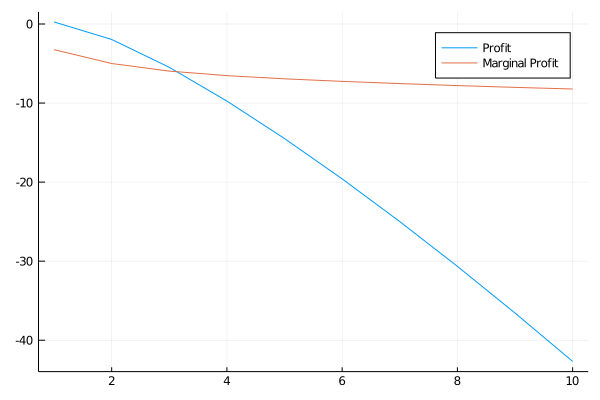

In [7]:
pl = plot(x=1:10, prof, label="Profit" )

plot!(pl, x=1:10, mP, label="Marginal Profit" )


---

## (modified) Solow model

This model tries to explain long-term productivity, its relation to productivity and the speed of convergence.

The setup is the following:

- a country accumulates capital $k_t$
- population $n_t$ grows at rate $g$ (so that $n_{t+1}=g n_t$
- capital and labour are combined to produce $y_t = A F(k_t, n_t)$ where $A>0$ is total factor productivity.
- capital depreciates at rate $\delta \in ]0,1[$. Its law of motion is $k_{t+1}=(1-\delta)k_{t}+i_{t}$ where $i_t$ is the amount invested at time $t$
- production is either consumed or invested: $y_t = c_t + i_t$

We choose a Cobb-Douglas specification with constant returns to scale $F(k_t, n_t) = k_t^{\alpha} n_t^{1-\alpha}$.

In the Ramsey–Cass–Koopmans  model (also called neoclassical growth model), a representative agent would choose $c_t$ in every period so as to maximize an intertemporal utility like $\sum_{t \geq 0} \beta^t U(c_t)$ where $\beta \in [0,1[$ is a time discount and $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ is the instantaneous felicity.

Here we follow the Solow-Swan specification and assume instead there is a fixed fraction $s\in[0,1[$ of income in every period, which is saved and invested in every period. In other words investment (or savings) is given by:

$$i_t = s y_t$$

As a result, the dynamic of capital and all other variables will be backward looking and can be simulated easily.

__Calibrate parameters $\beta$, $\delta$ and $g$, that is, propose plausible values for them, from the litterature, or by matching some observable fact.__

In [8]:
p = Dict('β' => 0.9 , 'δ' => 0.04, 'g' => 1.02, 's' => 0.3, 'α' => 0.7, 'A' => 0.5) #creating dictionary 


Dict{Char,Float64} with 6 entries:
  'β' => 0.9
  'A' => 0.5
  'g' => 1.02
  'δ' => 0.04
  's' => 0.3
  'α' => 0.7

__Detrend the equations of the model w.r.t. population growth. Denote the detrended variables with a hat (in the code we assume all variables are detrended and ignore the hat).__

We can detrend all equations w.r.t. populatulation growth through dividing by $n_t$ we thereby have a model with the following specifications: 

- a country accumulates capital per unit of labour as $\hat{k_t} = \frac{k_t}{n_t}$
- capital per unit of labour is used to produce output per unit of labour as  $\hat{y_t} = \frac{y_t}{n_t} = A F(\frac{k_t}{n_t}, 1) = A \frac{k_t}{n_t}^\alpha = \hat{k}^\alpha$ where $A>0$ is total factor productivity and the CD specification is used.
- capital per unit of labour depreciates at rate $\delta \in ]0,1[$. Its law of motion is $\hat{k_{t+1}}=\frac{k_{t+1} }{n_{t+1} } = \frac{k_{t+1} }{g n_{t} } = \frac{(1-\delta)k_{t}+i_{t}}{g*n_t} = \frac{(1-\delta)}{g}\hat{k_t}+\frac{1}{g}\hat{i_t}$ where $\hat{i_t}$ is the amount per unit labour invested at time $t$ 
- production  per unit labour is either consumed or invested: $\hat{y_t} = \hat{c_t} + \hat{i_t}$

Note that in ther detrended version we have

$$\hat{i_t} = s \hat{y_t}$$


Our goal is to compute the steady-state and assess its stability.

__Compute a function `f` which returns the capital $\hat{k}_{t+1}$ as a function of $\hat{k_t}$. It is suggested to define `f(k::Float64, p::Dict{Symbol, Float64})` where `p` is a dictionary of parameters.__

 (note: such a dictionary can be defined as `p = Dict(:a=>0.9, :b=>4)` and accessed with brackets `p[:a]` or `p[:b]`) (note2: symbols like `:a` or `:b` are lightweight string. The content must be a valid julia identifier so that it is valid to write `a=p[:a]`)

In [9]:
function f(k::Float64, p::Dict{Char, Float64})
    α = p['α']
    δ  = p['δ']
    s = p['s']
    A = p['A']
    g = p['g']
    return (1-δ)*k/g+A/g*s*k^α
    end  #fix dictionary implimentation to more userfriendly version   

f (generic function with 1 method)

__Starting from an initial level $\hat{k}_0$ compute successive iterates of `f` to find the long-run level $\overline{k}$ of capital per capita. (Bonus: produce a nice plot of the convergence)__

In [10]:
function simulate(f, p::Dict{Char, Float64}, N =1000, k0 = 20.0) 
    k =  Array{Float64,1}(undef, N) 
    k[1] = k0
    dif = Array{Float64,1}(undef, N) 
    ϵ = 0.0001
    j = 0
    for i in 1:(N-1)
        j = i
        k[i+1] = f(k[i], p)
        dif[i] = abs(k[i+1]-k[i])
        if dif[i] < ϵ
            break 
        end 
        end 
    return (k[1:j],dif[1:j])
end 


k,dif = simulate(f, p)


([20.0, 20.020854504520308, 20.041356073605506, 20.06151041410673, 20.081323150079754, 20.10079982363635, 20.119945895801116, 20.13876674737292, 20.157267679790305, 20.17545391600011  …  21.199824591980697, 21.19994039774541, 21.200054160317897, 21.200165915739134, 21.200275699414618, 21.200383546125565, 21.20048949003991, 21.200593564723096, 21.200695803148704, 21.200796237708886], [0.020854504520308126, 0.020501569085197957, 0.02015434050122522, 0.01981273597302291, 0.019476673556596324, 0.019146072164765826, 0.018820851571803132, 0.018500932417385485, 0.018186236209803752, 0.017876685328548803  …  0.0001158057647145938, 0.00011376257248585375, 0.00011175542123709192, 0.00010978367548375445, 0.00010784671094654641, 0.00010594391434537442, 0.00010407468318618385, 0.00010223842560819207, 0.00010043456018138386, 9.866251570400664e-5])

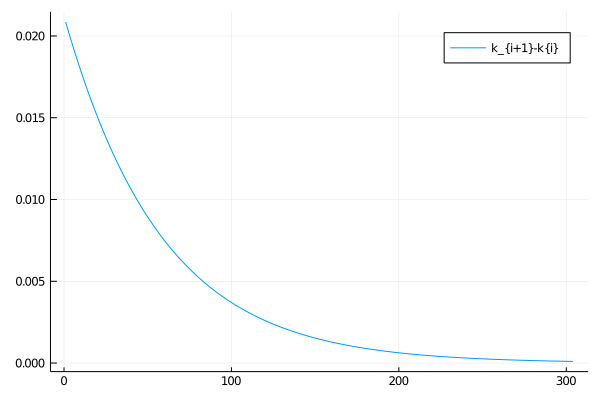

In [11]:
p1 = plot(x = 1:750, dif, label="k_{i+1}-k{i}")

__What factors affect the steady-state level of capital?__

The steady state level of capital can be defined as the state where $\hat{k_{t+1}} = \hat{k_t}$. Where have that at the steade state level of capital $ k_* = \frac{(1-δ)}{g} k_*+\frac{A}{g} s k_*^α$, assuming that $k_* \neq 0$ we have that $1-\delta - g+Ask^{\alpha-1} = 0$. Thereby $k_* = \left( \frac{g+\delta-1}{As} \right)^\frac{1}{\alpha - 1} $ so the steady-state level of capital is affected by the population growth rate, the rate of capital depreciation, the savings rate, the technological constant and the $\alpha$ paramater in the production function. 

__Study the stability of $f$ around $\overline{k}$. Which factors affect the speed of convergence towards the steady-state?__

To study the stability of f around $k_*$, let us recall that by definition $f(k) = k^\alpha$ therefore we need to study the stability of k around $k_*$. To do this, let us exam the rate of change of $k_t$ as define by $k_{t+1}-k_t = \frac{(1-\delta)-g}{g}\hat{k_t}+\frac{1}{g}sf(k)$. When $k_t < k_*$ we  have that $k_{t+1}-k_t >  \frac{(1-\delta)-g}{g}\hat{k_*}+\frac{1}{g}sf(k_*)>0$ so $k_{t+1}$ is increasing till $k_{t+1} = k_*$. 

Conversily if we assume $k_t > k_*$ we have that $k_{t+1}-k_t <  \frac{(1-\delta)-g}{g}\hat{k_*}+\frac{1}{g}sf(k_*)<0$ so $k_{t+1}$ decreasing monotonically till it reaches $k_*$. 

We can therefore conclude that $f(k)$ converges to $f(k_*)$ for all values of k. 


To study the speed of convergence of $k_t$, let us linearize the difference between $k_{t+1}-k_t$ at $k_*$. 

$$
\begin{equation}
    \begin{split}
    k_{t+1}-k_* - (k_{t}-k_*) &= \frac{\alpha s(k^*)^{\alpha-1}-(\delta+g-1)}{g}(k_t-k_*)  \\
    &= - \frac{(1-\alpha)(\delta+g-1)}{g}(k_t-k_*)     
    \end{split}
\end{equation}
$$

Therefore, we can define the convergence speed as $\lambda = \frac{(1-\alpha)(\delta+g-1)}{g}$. Note that output converges at an equal speed aswell.  

__Compute the steady-state directly using a Newton method and compare convergence speed.__

In [12]:
function Newton(f,df,ddf, x0,p, N=1000)
    ϵ = 0.00000001
    x =  Array{Float64,1}(undef, N) 
    x[1] = x0
    dif = Array{Float64,1}(undef, N) 
    j = 0
    for i in 1:(N-1)
        j = i
        x[i+1] = x[i]-df(x[i])/ddf(x[i])
        dif[i] = abs(x[i+1]-x[i])
        if dif[i] < ϵ
            break 
        if df(x[i],p)< ϵ
            break 
        end 
        end 
    return (x[1:j],dif[1:j])
end  
end
    

Newton (generic function with 2 methods)

__Suppose one tries to maximize steady-state consumption by choosing saving rate $s$. Which value would one choose?__

Note that the steady state level of consumption is given by $c_* = (1-s)f(k_*) = (1-s ) \left( \frac{g+\delta-1}{As} \right)^\frac{1}{\alpha - 1}  $. This can analytically be solved for by assuming c is continuous in $s$ and taking first order conditions to find $\frac{\delta c}{\delta s}= - \frac{s}{1-s}+\frac{\alpha}{1-\alpha}$. Therefore the level of savings that maximizes capital is $s=\alpha$. 


Alternatively, we can numerically solve for the optimal $s$ by appling Newton's method  to $\frac{\delta c}{\delta s}$ as done below:

In [13]:
function f(s,p)
    α = p['α']
    return -s/(1-s)+α/(1-α)
    end 


function df(s)
    return 2s/(1-s)^2 
    end 

function ddf(s)
    return (2(1-s)^2+2(1-s))/(1-s)^2 
    end 


ddf (generic function with 1 method)

In [14]:
x0 = 0.0
s,dif = Newton(f,df,ddf,x0,p) 

MethodError: MethodError: no method matching iterate(::Nothing)
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:603
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:603
  iterate(!Matched::ExponentialBackOff) at error.jl:253
  ...

---

## Exercise: constrained optimization

Consider the function $f(x,y) = 1-(x-0.5)^2 -(y-0.3)^2$.

__Use Optim.jl to minimize $f$ without constraint. Check you understand diagnostic information returned by the optimizer.__

In [30]:
import Pkg; Pkg.add("Optim")
using Optim 


f(x) = 1 - (x[1]-0.5)^2- (x[2]-0.3)^2
x0 = [0.0, 0.0]

res = optimize(f, x0)

  Resolving package versions...
   Updating `~/Project.toml`
 [no changes]
   Updating `~/Manifest.toml`
 [no changes]


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Minimizer: [-1.86e+154, 2.93e+153]
    Minimum:   -Inf

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2630


__Now, consider the constraint $x<0.3$ and maximize $f$ under this new constraint.__

In [32]:
lower = [-Inf, -Inf]
upper = [0.3, Inf]
initial_x = [0.0, 0.0]
inner_optimizer = GradientDescent()
f(x) = -1*( 1 - (x[1]-0.5)^2- (x[2]-0.3)^2 )

results = optimize(f, lower, upper, initial_x, Fminbox(inner_optimizer))


 * Status: success

 * Candidate solution
    Minimizer: [3.00e-01, 3.00e-01]
    Minimum:   -9.600000e-01

 * Found with
    Algorithm:     Fminbox with Gradient Descent
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 4.00e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    7
    f(x) calls:    1180
    ∇f(x) calls:   1180


__Reformulate the problem as a root finding with lagrangians. Write the complementarity conditions.__

We want to minimize the function $f(x,y) = -1*(1 - (x-0.5)^2- (y-0.3)^2)$ subject to the constraints $0.3-x>0$. We thereby have the Lagragian

$$\mathcal{L}(x,y) = -1*(1 - (x-0.5)^2- (y-0.3)^2) - \lambda(0.3-x) $$

such that $\lambda \geq 0$ and $\lambda(0.3-x) = 0$. We thereby want to solve the problem $ \nabla{ \mathcal{L} }  = 0 $ such that  $\lambda(x-0.3) = 0$. We thereby get the system:

$$
\star \begin{cases}
-2x + \lambda = 0 \\
-2y + 0.6 = 0\\
\lambda(x-0.3) = 0 \\
\end{cases}
$$

__Solve using NLSolve.jl__

To solve the problem using the NLsolve method we need to find continuous functions that incorporate the constraints of this problem. To do this we note that the constraints are orthoganailty constraints which can be replaced by the Fisher-Burmeister function as done in the lecture. 

Note we can define such $f: \mathbb{R}^2 \to \mathbb{R}^2$ as:

$f_1 = (2x-1)(x-0.3)(0.3-x-\sqrt{(x-0.3)^2})$ and
$f_2 = -2y+0.6$


Where we calculated $f_1$ by combining the first and the third conditions in $\star$ in the style of the lecture. 

From there, it is straight forward to calculate the elements of the Jacobian by taking the partial derivatives of f w.r.t. x and y. The formula can be seen in the code below

In [35]:
import Pkg; Pkg.add("NLsolve")

  Resolving package versions...
   Updating `~/Project.toml`
 [no changes]
   Updating `~/Manifest.toml`
 [no changes]


In [36]:
using NLsolve

function f!(F, x)
    F[1] = (2*x[1]-1)*(x[1]-0.3)*( 0.3-x[1]-sqrt((0.3-x[1])^2) )
    F[2] = -2*x[2] +0.6
end

function j!(J, x)
    J[1, 1] = -6*x[1]^2 + 4.4*x[1]- (4*x[1]-1.6)*sqrt((0.3-x[1])^2) + (2*x[1]^2 -1.6*x[1] +0.3)*(0.3-x[1])/sqrt((0.3-x[1])^2)
    J[1, 2] = 0
    J[2, 1] = 0
    J[2, 2] = -2
end

nlsolve(f!, j!, [10.; 10.])



Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [10.0, 10.0]
 * Zero: [0.3005984507957437, 0.3]
 * Inf-norm of residuals: 0.000000
 * Iterations: 1000
 * Convergence: false
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: false
 * Function Calls (f): 65
 * Jacobian Calls (df/dx): 65

---

## Consumption optimization

A consumer has preferences $U(c_1, c_2)$ over two consumption goods $c_1$ and $c_2$.

Given a budget $I$, consumer wants to maximize utility subject to the budget constraint $p_1 c_1 + p_2 c_2 \leq I$.

We choose a Stone-Geary specification where

$U(c_1, c_2)=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2)$

__Write the Karush-Kuhn-Tucker necessary conditions for the problem.__

We can write the lagrangian of the problem as $\mathcal{L}(x,y) =\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2) - \lambda (I - p_1c_1-p_2c_2)$. With complementary and slackness conditions: 

   - $ \lambda \geq 0$ 
   - $ \lambda (I - p_1c_1-p_2c_2) = 0 $

Taking first order conditions we thereby know that the problem must satisfy: 

- $\frac{\partial U}{\partial c_1} - \lambda p_1 = 0$

- $\frac{\partial U}{\partial c_2}- \lambda p_2 = 0$

- $\lambda(p_1 c_1 + p_2 c_2 -I) = 0$


__Verify the KKT conditions are sufficient for optimality.__

__Derive analytically the demand functions, and the shadow price.__

Solving the first order conditions previously described we get the system of equations:

\begin{cases}
\frac{\beta_1}{c_1 - \gamma_1} - \lambda p_1 = 0\\\\
\frac{\beta_2}{c_2 - \gamma_2}- \lambda p_2 = 0\\\\
\lambda(p_1 c_1 + p_2 c_2 -I) = 0
\end{cases}

We thereby have thereby obtain the value of the shadow price as  $\lambda = \frac{\beta_1}{(c_1 - \gamma_1)p1} = \frac{\beta_2}{(c_2 - \gamma_2)p2} $. Note we can assume that $\beta_1 \neq 0$ and $\beta_2 \neq 0$ otherwise the individual would have zero utility. Thereby, we have that the budget constraint is binding or that $p_1 c_1 + p_2 c_2 -I =0$. 

From here we can find the demand functions by rewriting $c1 = I-p_2c_2$ to get: 

$$
\begin{align}
(c_2 - \gamma_2)p_2\beta_1 &= \beta_2(I-p_2c_2 - p_1\gamma_1)\\
c_2(p_2\beta_1 + \beta_2p_2) &=\beta_2(I- p_1\gamma_1) + \gamma_2 p_2\beta_1\\
c_2(p_1,p_2) &=\frac{\beta_2(I- p_1\gamma_1) + \gamma_2 p_2\beta_1}{p_2\beta_1 + \beta_2p_2}
\end{align}
$$

Resubstituting into the budget constraint we get $c_1$ as: 

$$
c_1(p_1,p_2)= \frac{\beta_1(I- p_2\gamma_2) + \gamma_1 p_1\beta_2}{p_1\beta_2 + \beta_1p_1}
$$

Therefore, 

$$
\lambda^*=  \frac{\beta_1 + \beta_2}{I -\gamma_2p_2 - p_1\gamma_1}
$$

__Interpret this problem as a complementarity problem and solve it using NLSolve.__

__Produce some nice graphs with isoutility curves, the budget constraint and the optimal choice.__



The iso-utility curves can be obtained by fixing a level of utility $\bar{u}$ and expressing $c_2$ as a function of $c_1$. We thereby have: 

$$
\begin{align}
 \bar{u} &= \ln\left((c_1-\gamma_1)^{\beta_1}(c_2-\gamma_2)^{\beta_2}\right)\\\\
exp(\bar{u}) &= (c_1-\gamma_1)^{\beta_1}(c_2-\gamma_2)^{\beta_2}\\\\
c_2 &= \left[\frac{exp(\bar{u} )}{(c_1 - \gamma_1)^{\beta_1}} \right]^{\frac{1}{\beta_2}} + \gamma_2
\end{align}
$$


The budget constraint can simply be incorporated as:

$$
c_1 = \frac{I - p_2c_2}{p_1}
$$

Here I will plot the curves using an initial set of values for the parameters. They are arbitrary.

In [37]:
p = Dict(:I=>50.0, :p1 =>1.0, :p2 =>2.0, :γ1 =>0.3, :γ2 => 0.4, :β1 => 0.5, :β2 => 0.6)

Dict{Symbol,Float64} with 7 entries:
  :p2 => 2.0
  :γ2 => 0.4
  :I  => 50.0
  :β1 => 0.5
  :p1 => 1.0
  :γ1 => 0.3
  :β2 => 0.6

In [43]:
function isoutil(c_1,u,p)
    γ1 = p[:γ1]
    γ2 = p[:γ2]
    β1 = p[:β1]
    β2 = p[:β2]
  return (exp(u)/(c_1-γ1)^(β1))^(1/β2) + γ2
end

function budget(c1,p)
    return (p[:I] - p[:p1]*c1)/p[:p2]
end



budget (generic function with 1 method)

In [56]:
c1 = [i for i in 1:20]
B = [budget(c,p) for c in c1]
Iso = [isoutil(c,1.5,p) for c in c1]

20-element Array{Float64,1}:
 16.79914369830421
  8.228804299803631
  5.724347607988035
  4.494819549555641
  3.7547074756969034
  3.2565411961226736
  2.896551537555739
  2.6232788357084234
  2.4081839615473397
  2.234114423603813
  2.090115520814039
  1.9688496312324242
  1.8652096510946952
  1.7755268288239603
  1.697094922055757
  1.627872184107527
  1.566288013335059
  1.511113649661071
  1.461373400274331
  1.4162822715313057

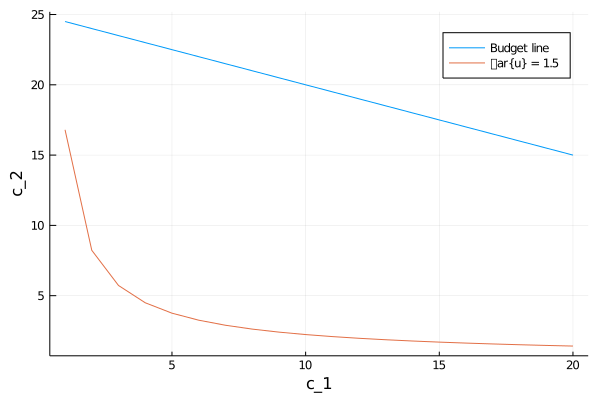

In [57]:
pl = plot(c1,B, label="Budget line",xlabel="c_1", ylabel = "c_2")
plot!(pl, c1, Iso,  label="\bar{u} = 1.5")

Below is the function that computers the choices of c_1 and c_2 given the values for the initial paramaters. An example is calculated that it works!

In [58]:
function get_c(p)
    I  = p[:I]
    γ1 = p[:γ1]
    γ2 = p[:γ2]
    β1 = p[:β1]
    β2 = p[:β2]
    p1 = p[:p1]
    p2 = p[:p2]  
    c1 = (β1*(I-p2*γ2) + γ1*p1*β2)/(p1*β2 + β1*p1)
    c2 = (β2*(I-p1*γ1) + γ2*p2*β1)/(p2*β1 + β2*p2)
   return [c1,c2]
end

get_c(p)

2-element Array{Float64,1}:
 22.527272727272727
 13.736363636363635